In [50]:
from PIL import Image

from matplotlib.pyplot import *
%matplotlib inline

import numpy as np
import pandas as pd

import time

import collections

%load_ext autoreload
%autoreload 2

import processing

import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import paramiko
ssh = paramiko.SSHClient()
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh.connect("172.24.1.1", username="pi", password="framboos")

/usr/lib/python3/dist-packages/Crypto/Cipher/blockalgo.py:141: FutureWarning: CTR mode needs counter parameter, not IV
  self._cipher = factory.new(key, *args, **kwargs)


In [9]:
master = processing.Master("./images/run1/", ssh, delete=True, save=True)
master.run_camera()

0
>>  Receiving images ----------------------------------------
1
2
3
4
5
6
7
8
9
10
>>  Warm up ended -------------------------------------------
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
24

/home/wouters/thesis/projects/ballsorter2/processing.py:157: RuntimeWarning: invalid value encountered in double_scalars
  if not self.ball and rolling_local > self.ball_rolling_cutoff:


KeyboardInterrupt: 

In [51]:
ssh = None
processor_args = {}
decisionmaker_args = {}

In [5]:
processor_args = {"colorbin_models":colorbin_models}
decisionmaker_args = {"knn_model":knn_model}

NameError: name 'colorbin_models' is not defined

In [52]:
master = processing.Master("./images/run235/", ssh, delete=False, save=False, processor_args=processor_args, decisionmaker_args=decisionmaker_args)
master.run_local()
master.decisionmaker.balls_old = master.decisionmaker.balls

Not connecting sorter
('blue', 'blue_orange', 'green_orange', 'yellow', 'yellow_blue')
8633
>>  Receiving images ----------------------------------------
>>  Warm up ended -------------------------------------------
Ball is passing by...
Ball has passed...
deciding...
Sending gate 1
Ball is passing by...
Ball has passed...
deciding...
Sending gate 0
Ball is passing by...
Ball has passed...
deciding...
Sending gate 3
Ball is passing by...
Ball has passed...
deciding...
Sending gate 0
Ball is passing by...
Ball has passed...
deciding...
Sending gate 0
Ball is passing by...
Ball has passed...
deciding...
Sending gate 0
Ball is passing by...
Ball has passed...
deciding...
Sending gate 0
Ball is passing by...
Ball has passed...
deciding...
Sending gate 3
Ball is passing by...
Ball has passed...
deciding...
Sending gate 4
Ball is passing by...
Ball has passed...
deciding...
Sending gate 4
Ball is passing by...
Ball has passed...
deciding...
Sending gate 1
Ball is passing by...
Ball has passe

/home/wouters/thesis/projects/ballsorter2/processing.py:190: RuntimeWarning: invalid value encountered in double_scalars
  rolling_fold = rolling_local/rolling_global


In [53]:
master.decisionmaker.balls = master.decisionmaker.balls_old

In [54]:
## REMOVE BALLS, watch out!!
remove_balls = [21, 32, 14, 15, 16, 17, 37, 38, 39, 40, 45, 54, 55, 56, 57]
master.decisionmaker.balls = [master.decisionmaker.balls_old[i] for i in range(len(master.decisionmaker.balls_old)) if i not in remove_balls]

In [55]:
master.decisionmaker.balls[0]["bincounts"]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [56]:
master.decisionmaker.balls[0]["bincounts"].shape

(32768,)

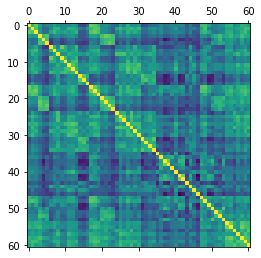

In [57]:
allbincounts = np.vstack([ball["bincounts"] for ball in master.decisionmaker.balls])
allbincounts = allbincounts[0:allbincounts.shape[0]-1, :]
balls = master.decisionmaker.balls[0:len(master.decisionmaker.balls)]

cors = np.corrcoef(allbincounts)
matshow(cors)

In [58]:
len(balls)

62

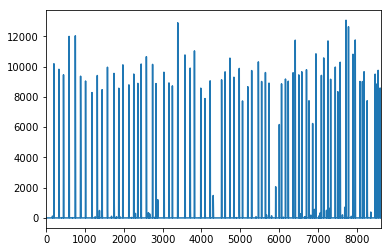

In [59]:
master.processor.log["rolling_local"].plot()

In [60]:
images = []

folder = master.processor.imagefolder
for ball in balls:
    ids = list(ball["ids"])
    i = ids[len(ids)//2]
    
    print(i)
    
    for j in range(i-4, i+4, 2):
        image = Image.open(folder + str(j) + ".jpg")
        images.append(image)

203
332
451
594
755
892
1017
1183
1320
1443
1582
1750
1874
1979
2584
2744
2833
3036
3167
3254
3392
3578
3711
3823
3986
4093
4226
4522
4611
4735
4839
5469
5552
5650
5743
6006
6064
6166
6237
6361
6418
6509
6586
7090
7150
7260
7328
7449
7513
7575
7725
7789
7905
7963
8084
8149
8190
8269
8475
8512
8553
8603


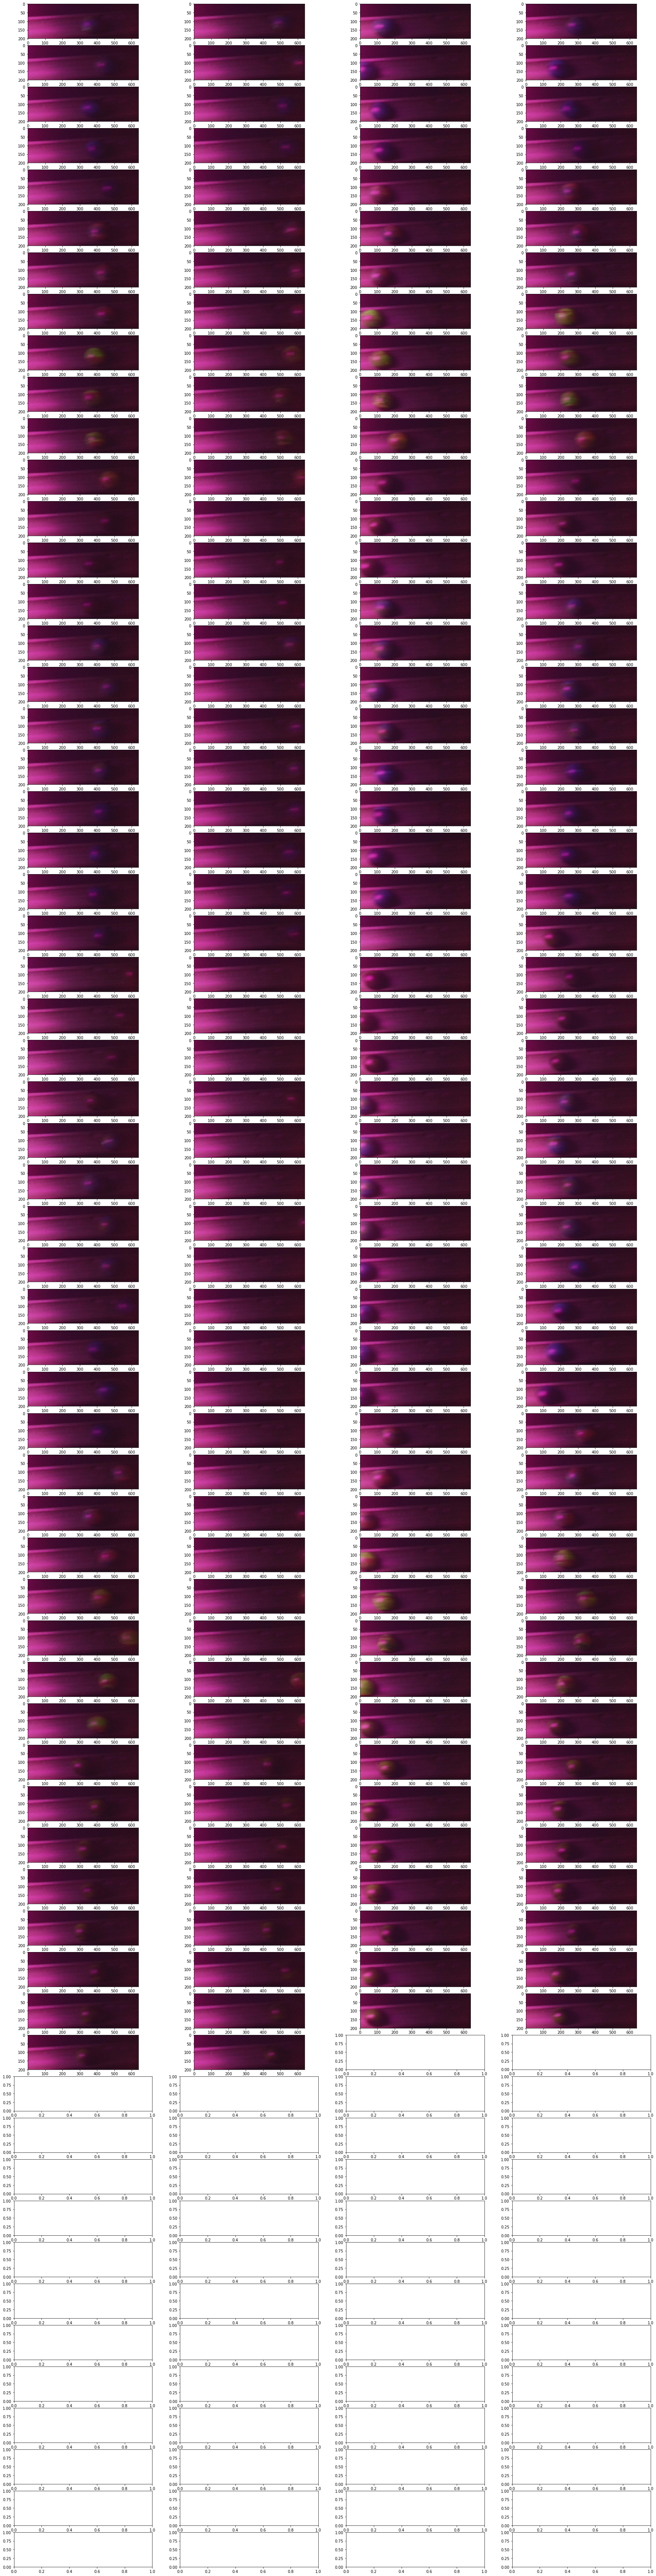

In [61]:
nrows = math.ceil(len(images) / 4)
ncols = 4
fig, axes = subplots(nrows=nrows, ncols=ncols, figsize=(30, nrows * 2))

for i, image in enumerate(images[50:]):
    axes[math.floor(i/ncols), i%ncols].imshow(np.array(image) / 255)

In [64]:
gates = {
    "blue_orange":frozenset({"orange", "blue"}),
    "green_orange":frozenset({"orange", "green"}),
    "blue":frozenset({"blue"}),
    "yellow":frozenset({"yellow"}),
    "yellow_blue":frozenset({"yellow", "blue"})
}
types = np.array(["blue_orange","blue_orange","blue_orange",
                  "green_orange","green_orange","green_orange",
                  "yellow","yellow","yellow","yellow",
                  "yellow_blue","yellow_blue","yellow_blue","yellow_blue",
                  "blue","blue","blue",
                  "blue_orange","blue_orange","blue_orange",
                  "green_orange","green_orange","green_orange","green_orange",
                  "yellow","yellow","yellow",
                  "yellow_blue","yellow_blue","yellow_blue","yellow_blue",
                  "blue","blue","blue","blue",
                  "yellow","yellow","yellow","yellow",
                  "yellow_blue","yellow_blue","yellow_blue","yellow_blue",
                  "blue","blue","blue", "blue",
                  "blue_orange","blue_orange","blue_orange",
                  "green_orange","green_orange","green_orange","green_orange",
                  "yellow", "yellow", "yellow", "yellow", "yellow", "yellow", "yellow", "yellow"
                 ]
)
print(len(balls))
print(len(types))

62
62


In [65]:
import sklearn.neighbors
from sklearn.model_selection import LeaveOneOut, KFold
import sklearn.metrics

In [66]:
data = allbincounts
labels = np.array(types)

In [67]:
import sklearn.linear_model
import sklearn.ensemble
import sklearn.svm
import sklearn.naive_bayes

In [68]:
import sklearn.preprocessing

In [20]:
#data_old = data
#data = sklearn.preprocessing.scale(data_old.T).T

In [88]:
#knn_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model = sklearn.ensemble.RandomForestClassifier(n_estimators=500, max_depth=4)
#knn_model = sklearn.linear_model.LogisticRegression(n_jobs=4)
#knn_model = sklearn.svm.SVC(C=0.1)
#knn_model = sklearn.naive_bayes.GaussianNB()
#knn_model = sklearn.svm.LinearSVC()

for i in range(1):
    kf = LeaveOneOut()

    scores = []
    for train, test in kf.split(data):
        print(1)
        knn_model.fit(data[train, :], labels[train])
        predicted = knn_model.predict(data[test, :])
        scores.append(sklearn.metrics.accuracy_score(labels[test], predicted))
        
        if scores[-1] < 1:
            print(labels[test][0])
            print(predicted[0])
            print("---")
    print(np.mean(scores))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
yellow
yellow_blue
---
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0.983606557377


In [89]:
import pickle
pickle.dump(knn_model, open("knn_model.pkl", "bw"))

In [84]:
bins = [
    "orange",
    "blue",
    "yellow",
    "green"
]

allcounts = np.vstack([np.bincount(counts, minlength=2**(3*processing.binwidth)) for counts in master.processor.log.counts])

In [85]:
colorbin_models = []
for i, color in enumerate(bins):
    print(color)
    
    typesoi = [i for i, type_color in gates.items() if color in type_color]
    ballsoi = [t in typesoi for t in types]
    frameidsoi = [i for ids in pd.DataFrame(master.decisionmaker.balls).loc[ballsoi]["ids"] for i in ids]
    
    model = sklearn.linear_model.LogisticRegression()
    model.fit(allcounts, [frameid in frameidsoi for frameid in range(allcounts.shape[0])])
    
    #plot(model.predict_proba(allcounts)[:, 1]*(i+1), color=color)
    
    colorbin_models.append(model)

orange
blue
yellow
green


In [86]:
pickle.dump(colorbin_models, open("colorbin_models.pkl", "bw"))
pickle.dump(knn_model, open("knn_model.pkl", "bw"))